In [1]:
#Importing our dataset from csv file
import pandas as pd 
dataset=pd.read_csv(r'C:\Users\ASUS\Downloads\titanic-passengers.csv', sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,G6,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,G6,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,G6,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,G6,S


In [2]:
#Still in question 1
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
clf = DecisionTreeClassifier()  
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.776536312849162


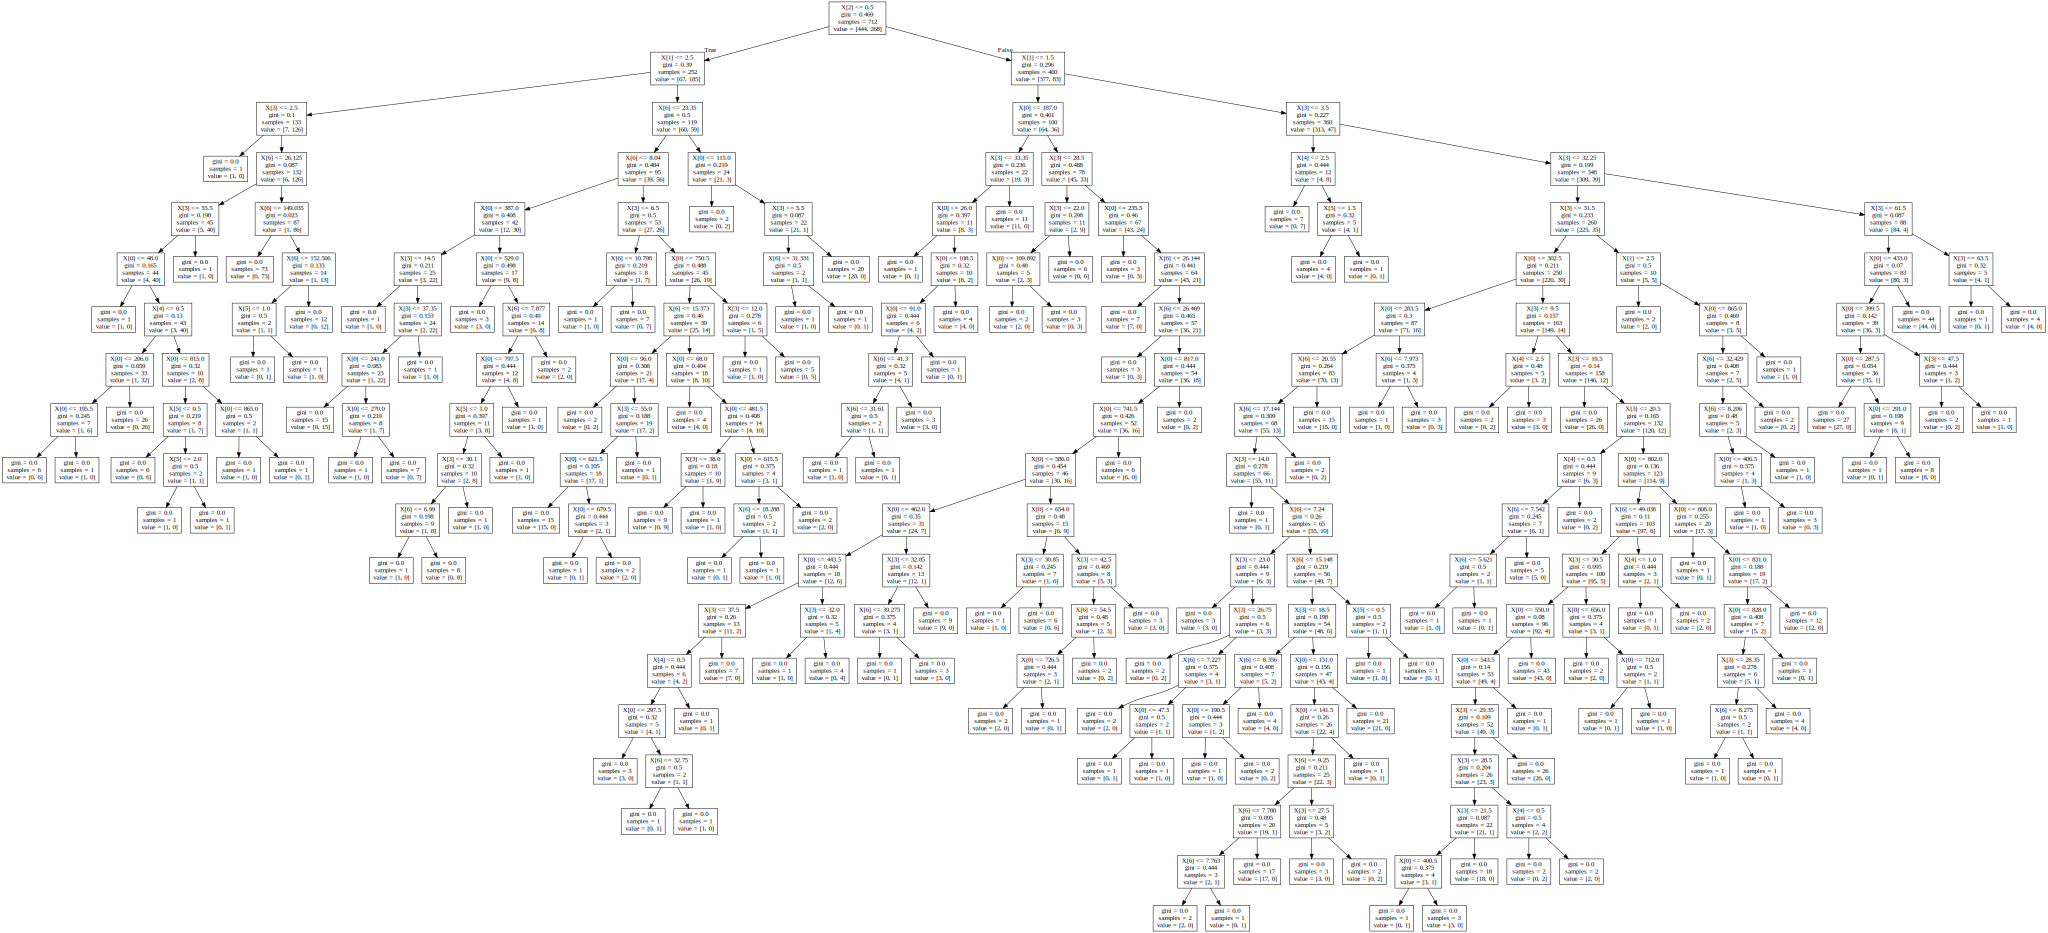

In [3]:
import graphviz
from sklearn import tree 
data = tree.export_graphviz(clf,out_file = None)
graph = graphviz.Source(data)
graph.render('data')
graph

score:0.776536312849162


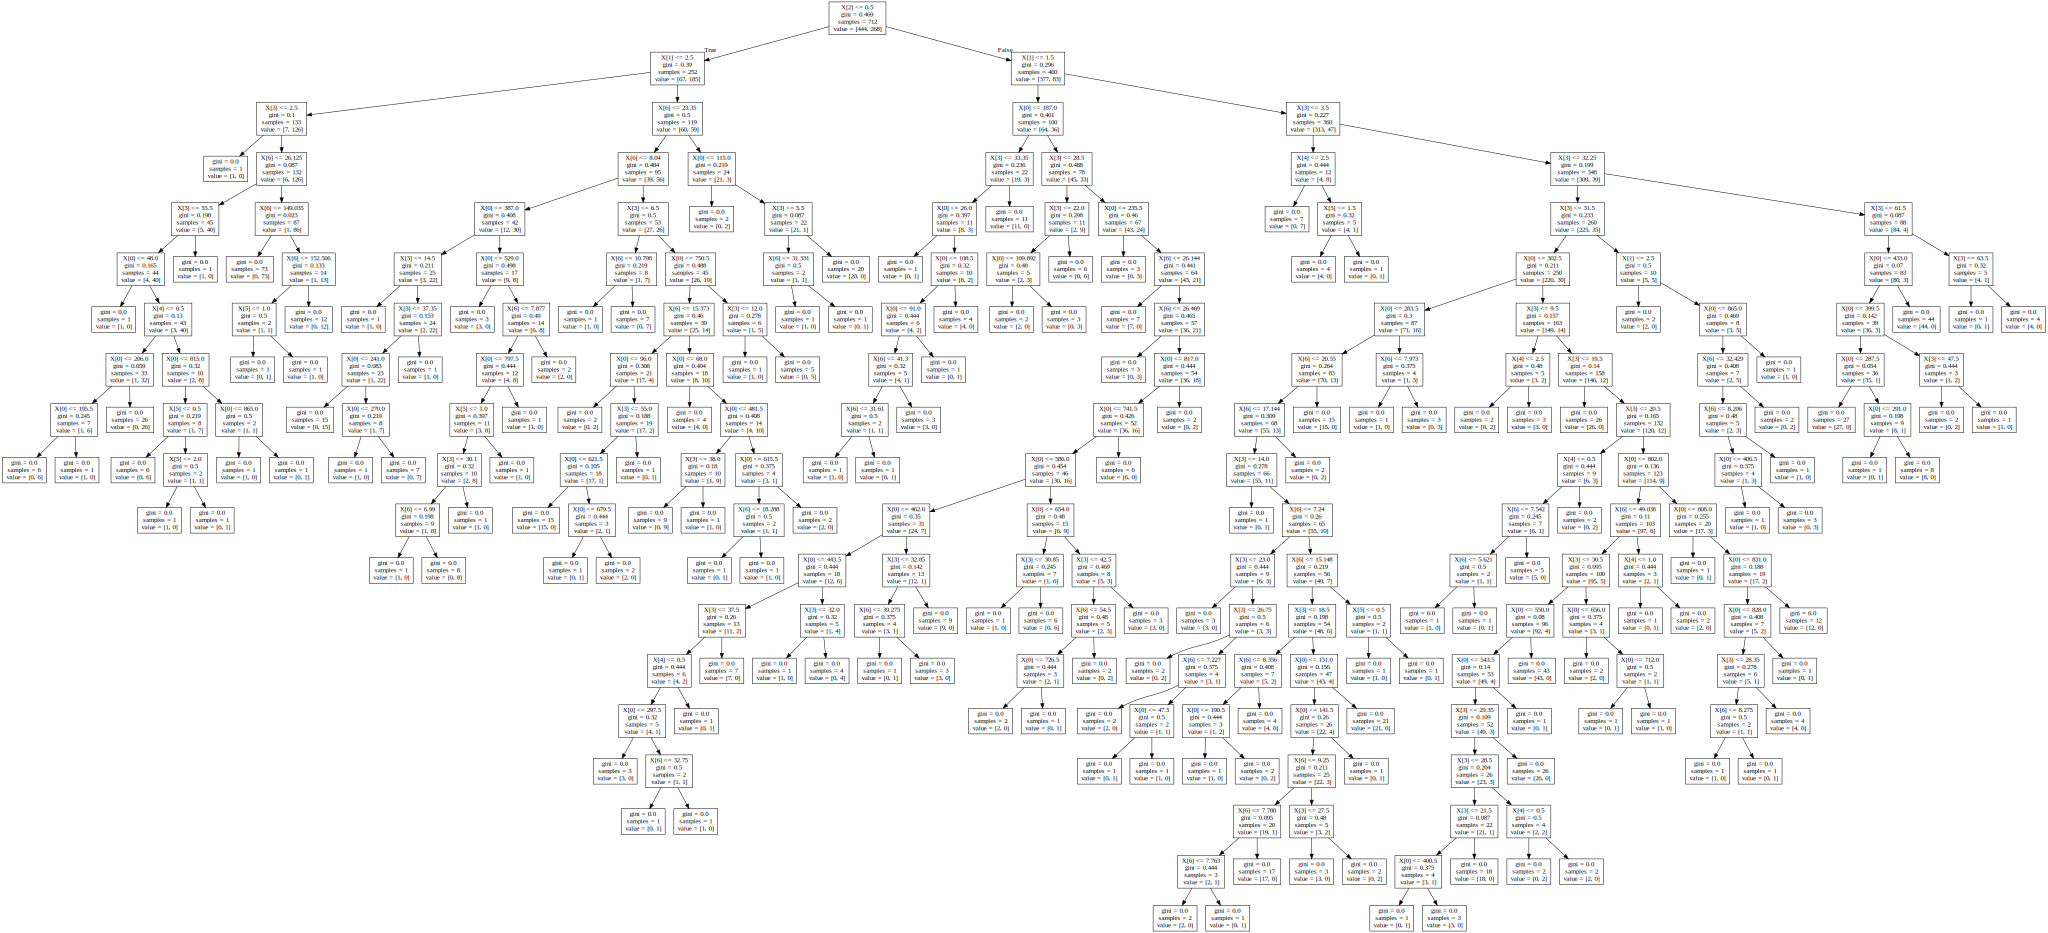

In [9]:
#Pruning the tree:
from sklearn import tree 
dtree= tree.DecisionTreeClassifier(criterion = "gini", splitter= 'random', max_leaf_nodes= 10, min_samples_leaf=5, max_depth=5)
y_pred=clf.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))
graph

In [10]:
#Random forest:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('Accuracy: ', metrics.accuracy_score(y_pred,y_test))

Accuracy:  0.8435754189944135


In [15]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)


In [16]:
print('Accuracy: ', metrics.accuracy_score(y_pred,y_test))

Accuracy:  0.8547486033519553


In [ ]:
# With the RandomForestClassifier the accuracy has increased and just because of the n estimators that are the number of trees 